In [3]:
import opendatasets as od

In [5]:
dataset_url = 'https://www.kaggle.com/datasets/ayushkhaire/stock-past-one-year-data'

In [7]:
od.download(dataset_url)

Skipping, found downloaded files in ".\stock-past-one-year-data" (use force=True to force download)


In [9]:
import pandas as pd

In [11]:
import os

In [13]:
print(os.listdir('.'))

['.anaconda', '.conda', '.condarc', '.continuum', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.kaggle', '.matplotlib', '.ms-ad', '.node_repl_history', '.vscode', 'AppData', 'Application Data', 'cancer-prediction-dataset', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'Favorites', 'Links', 'Local Settings', 'microsoft-stock-details-updated-regularly', 'ML', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{93e28ea8-c660-11ee-a588-00e04c681010}.TM.blf', 'NTUSER.DAT{93e28ea8-c660-11ee-a588-00e04c681010}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{93e28ea8-c660-11ee-a588-00e04c681010}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PrintHood', 'Recent', 'Saved Games', 'Searches', 'SendTo', 'Start Menu', 'stock-past-one-year-data', 'Templates', 'Untitled.ipynb', 'Videos', 'World Happiness Project1.ipynb', 'world-happiness']


In [15]:
data_dir = 'stock-past-one-year-data'

In [17]:
print(os.listdir(data_dir))

['stocks_2023-06-13_to_2024-06-12.csv']


In [19]:
file_path = 'stock-past-one-year-data/stocks_2023-06-13_to_2024-06-12.csv'

In [21]:
data = pd.read_csv(file_path)

In [23]:
print(data.head())

   Unnamed: 0        Date       Open       High        Low      Close  \
0           0  2023-06-13  47.509998  47.509998  47.509998  47.509998   
1           1  2023-06-14  48.189999  48.189999  48.189999  48.189999   
2           2  2023-06-15  47.689999  47.689999  47.689999  47.689999   
3           3  2023-06-16  47.480000  47.480000  47.480000  47.480000   
4           4  2023-06-20  47.459999  47.459999  47.459999  47.459999   

   Adj Close  Volume Symbol  
0  45.508457     0.0   NVDA  
1  46.159813     0.0   NVDA  
2  45.680878     0.0   NVDA  
3  45.479725     0.0   NVDA  
4  45.460567     0.0   NVDA  


In [25]:
print(data.shape)

(116582, 9)


In [27]:
print(data.isnull().sum())

Unnamed: 0      0
Date            0
Open          556
High          556
Low           556
Close         556
Adj Close     556
Volume        556
Symbol          0
dtype: int64


In [29]:
data = data.dropna()

In [31]:
print(data.head())

   Unnamed: 0        Date       Open       High        Low      Close  \
0           0  2023-06-13  47.509998  47.509998  47.509998  47.509998   
1           1  2023-06-14  48.189999  48.189999  48.189999  48.189999   
2           2  2023-06-15  47.689999  47.689999  47.689999  47.689999   
3           3  2023-06-16  47.480000  47.480000  47.480000  47.480000   
4           4  2023-06-20  47.459999  47.459999  47.459999  47.459999   

   Adj Close  Volume Symbol  
0  45.508457     0.0   NVDA  
1  46.159813     0.0   NVDA  
2  45.680878     0.0   NVDA  
3  45.479725     0.0   NVDA  
4  45.460567     0.0   NVDA  


In [33]:
import matplotlib.pyplot as plt

In [35]:
import seaborn as sns

In [36]:
print(data.describe())

          Unnamed: 0          Open          High           Low         Close  \
count  116026.000000  1.160260e+05  1.160260e+05  1.160260e+05  1.160260e+05   
mean    58294.516289  3.392445e+03  3.450638e+03  3.348285e+03  3.402533e+03   
std     33656.231863  4.453350e+04  4.557153e+04  4.375331e+04  4.473239e+04   
min         0.000000  0.000000e+00  0.000000e+00  0.000000e+00  5.500000e-01   
25%     29142.250000  1.936000e+01  1.969000e+01  1.906000e+01  1.937000e+01   
50%     58296.500000  5.413000e+01  5.467950e+01  5.358000e+01  5.415000e+01   
75%     87445.750000  1.322375e+02  1.340475e+02  1.306575e+02  1.323575e+02   
max    116581.000000  1.659248e+06  1.665774e+06  1.639149e+06  1.659248e+06   

          Adj Close        Volume  
count  1.160260e+05  1.160260e+05  
mean   3.402188e+03  1.307753e+08  
std    4.473242e+04  1.581866e+09  
min    5.500000e-01  0.000000e+00  
25%    1.910030e+01  3.520000e+04  
50%    5.379000e+01  6.819000e+05  
75%    1.315783e+02  6.5524

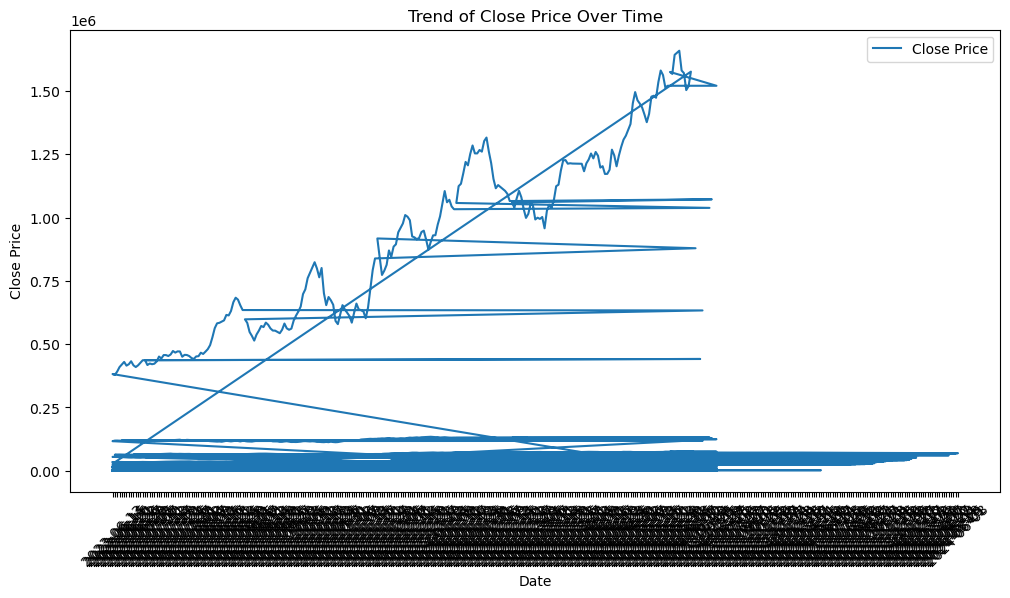

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Trend of Close Price Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [47]:
# Display the column names to identify the 'Date' column
print("Original columns:", data.columns)

# Strip any leading/trailing whitespace from column names
data.columns = data.columns.str.strip()

# Rename the 'Date' column if necessary
if 'Date' not in data.columns:
    if 'date' in data.columns:
        data.rename(columns={'date': 'Date'}, inplace=True)
    elif 'Unnamed: 0' in data.columns:
        data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
    else:
        print("Date column not found.")
        print("Available columns:", data.columns)

# Display the updated column names
print("Updated columns:", data.columns)


Original columns: Index(['Unnamed: 0', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Symbol'],
      dtype='object')
Updated columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Symbol'],
      dtype='object')


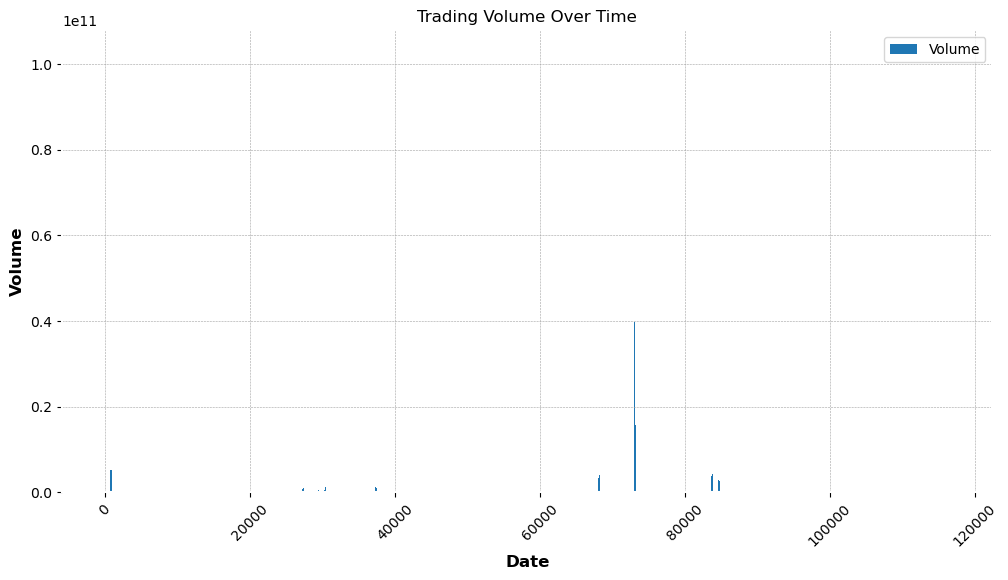

In [49]:
plt.figure(figsize=(12, 6))
plt.bar(data['Date'], data['Volume'], label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

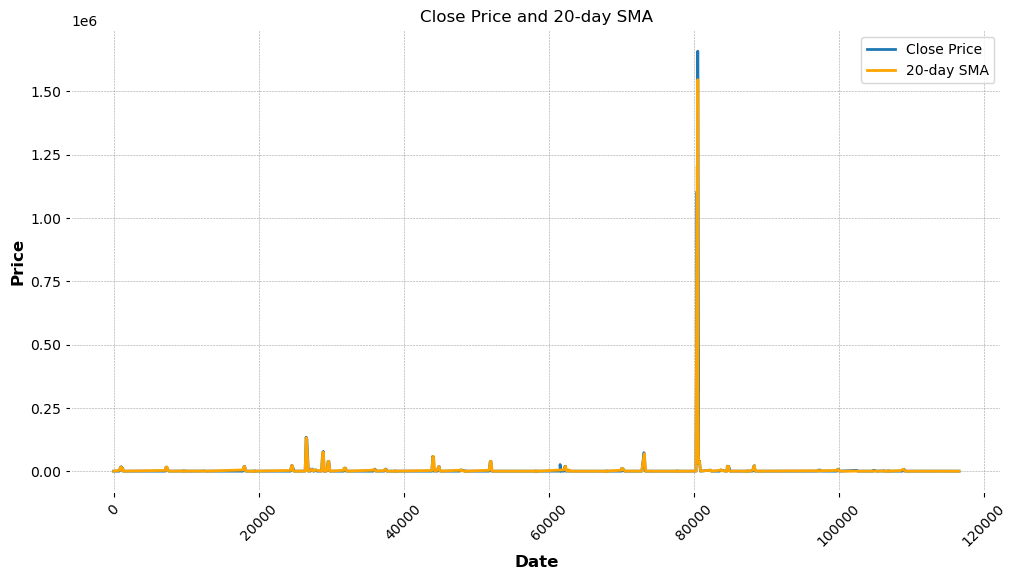

In [50]:
data['SMA'] = data['Close'].rolling(window=20).mean()  # 20-day Simple Moving Average
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['SMA'], label='20-day SMA', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and 20-day SMA')
plt.xticks(rotation=45)
plt.legend()
plt.show()